In [71]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
df = pd.read_csv("D:/New folder/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [74]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From the above data, it is observed that there are 9 label columns and 1 target column(Survived).
PassengerID is the index number. Survived is whether the passenger survived(1) or not(0).
PClass is the passenger class (1st, 2nd, 3rd).
Name column denotes the names of the passengers.
Sex denotes the gender whether Male or Female.
SibSp and Parch columns gives the information of number of Siblings and Parents/Children respectively.
Ticket column shows the TicketID.
Fare columns shows the amount paid by the passenger for his/her travel.
Cabin denotes the cabin number of the specific Cabin of the Titanic.
Embarked column shows the boarding location of the passenger.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
missing_values = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values.sum()
(total_missing/total_cells)*100

8.099513655069211

As it can be observed that the Age column has some null values and hence, I will fill the null values with mean value of the column. Regarding the Cabin column, as it has more than almost 70% null values, hence I will omit that column. Considering the PassengerID, Name and Ticket, it is irrelevant or of no use for the analysis as well the building up of the model. Hence, these columns will also be omitted.

In [77]:
df = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [78]:
#Filling up the missing values with the mean value for Age column
df['Age'].fillna(value=df['Age'].mean(), inplace = True)
#Filling up the missing values with the previous values for Embarked column
df['Embarked'].fillna(method = 'backfill', inplace = True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Now none of the columns has any null values, hence now I will proceed with further exploration and check for outliers

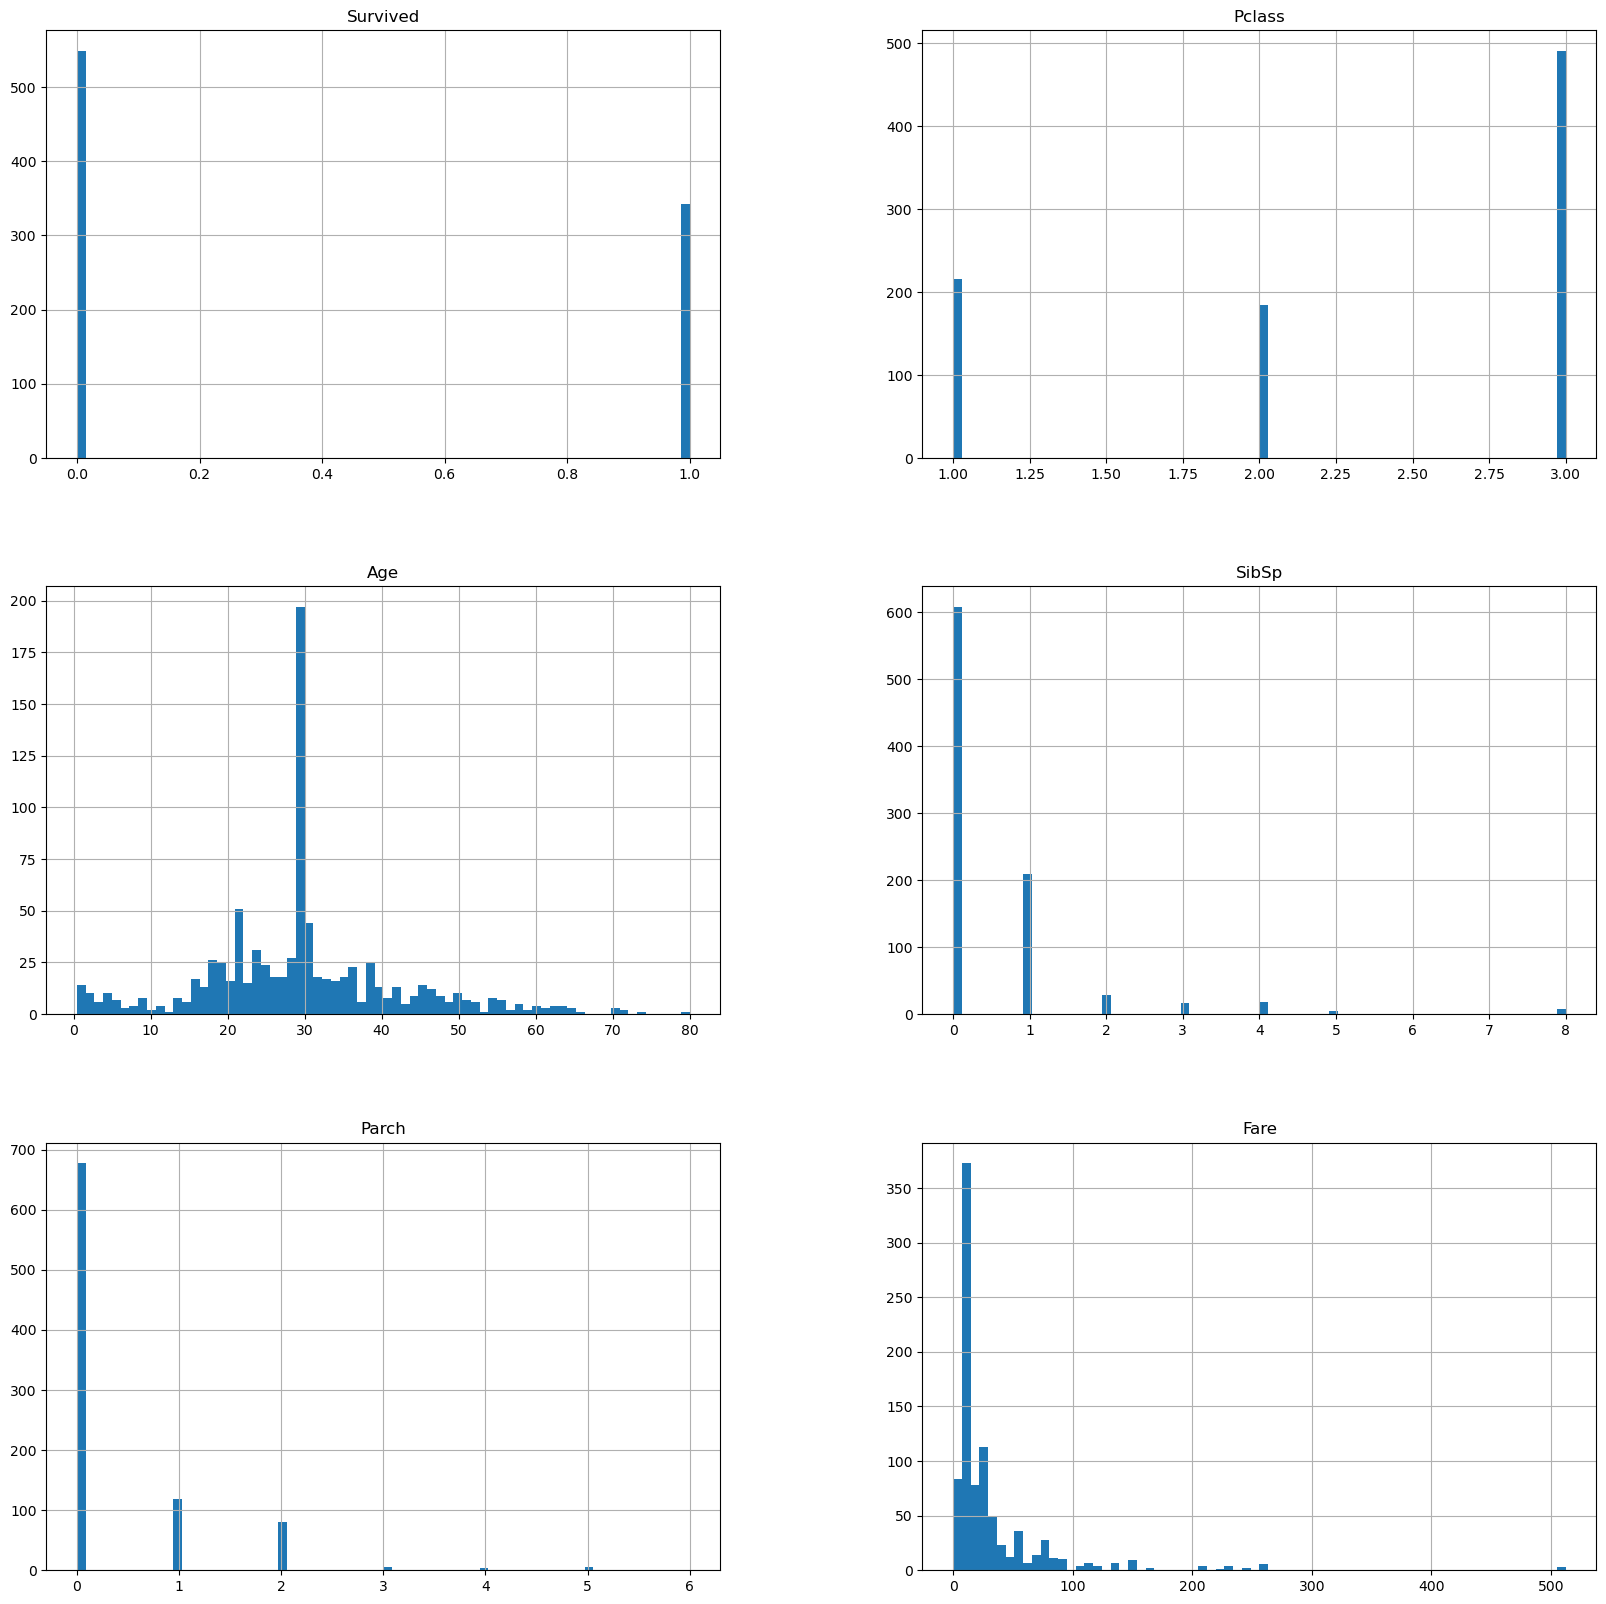

In [80]:
df.hist(figsize=(20, 20), bins=70)
plt.show()

The above figures shows that around 550 passengers did not survive whereas around 350 passengers survived.
Most of the passengers were among the Class 3 and the count of Class 1 and Class 2 passengers were near to 200.
The age column is almost normal and slightly skewed towards left with the highest number of passengers aging 30 years.
If the passenger has any sibling travelling alongwith then they had mostly only one sibling whereas most of them had no sibling travelling with them.
Very few passengers had eith 1 or 2 count of Parents/Children travelling with them whereas most of them were travelling alone.
A mojority of passengers paid a fare under 100 bucks.

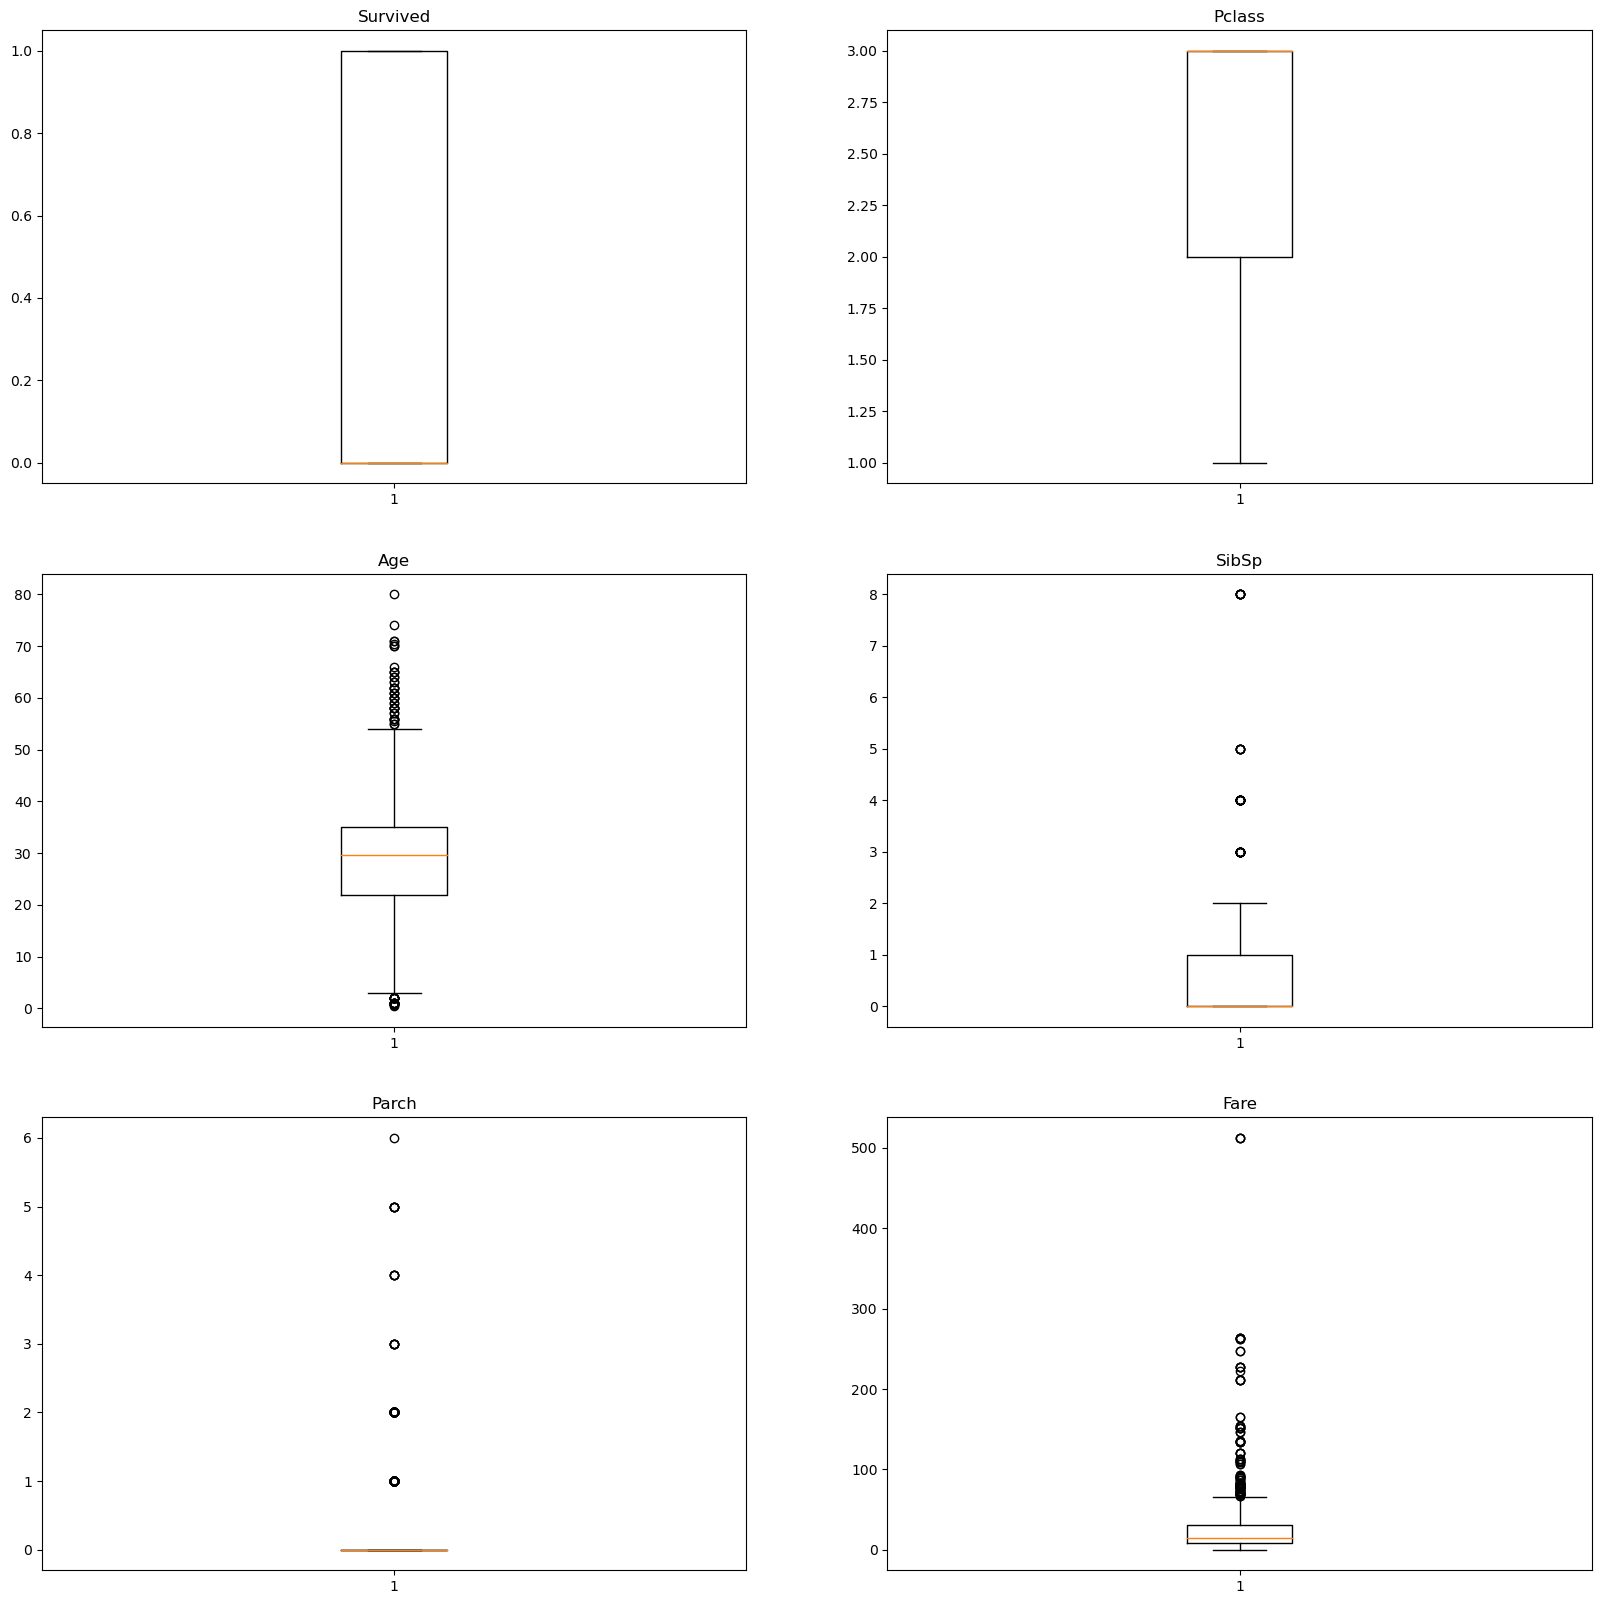

In [81]:
#Checking for outliers
fig = plt.figure(figsize =(20, 20))
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 2, i+1)
    plt.boxplot(df[col])
    plt.title(col)

plt.show()

As the above figures shows that there are a lot many outliers in the data but as each and every record is crucial hence, we cannot omit or replace such values.

In [82]:
#Joining two columns
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [83]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.000000,1,0,7.2500,S,2
1,1,1,female,38.000000,1,0,71.2833,C,2
2,1,3,female,26.000000,0,0,7.9250,S,1
3,1,1,female,35.000000,1,0,53.1000,S,2
4,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1
887,1,1,female,19.000000,0,0,30.0000,S,1
888,0,3,female,29.699118,1,2,23.4500,S,4
889,1,1,male,26.000000,0,0,30.0000,C,1


In [84]:
# Creating IsAlone feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.000000,1,0,7.2500,S,2,0
1,1,1,female,38.000000,1,0,71.2833,C,2,0
2,1,3,female,26.000000,0,0,7.9250,S,1,1
3,1,1,female,35.000000,1,0,53.1000,S,2,0
4,0,3,male,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,1
887,1,1,female,19.000000,0,0,30.0000,S,1,1
888,0,3,female,29.699118,1,2,23.4500,S,4,0
889,1,1,male,26.000000,0,0,30.0000,C,1,1


In [85]:
# Encoding Categorical Variables. Hence, performing binary encoding for Sex column
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# One-hot encoding for Embarked column
df = pd.get_dummies(df, columns=['Embarked'])

In [86]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,2,0,0,0,1
1,1,1,0,38.000000,1,0,71.2833,2,0,1,0,0
2,1,3,0,26.000000,0,0,7.9250,1,1,0,0,1
3,1,1,0,35.000000,1,0,53.1000,2,0,0,0,1
4,0,3,1,35.000000,0,0,8.0500,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,1,1,0,0,1
887,1,1,0,19.000000,0,0,30.0000,1,1,0,0,1
888,0,3,0,29.699118,1,2,23.4500,4,0,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,1,1,0,0


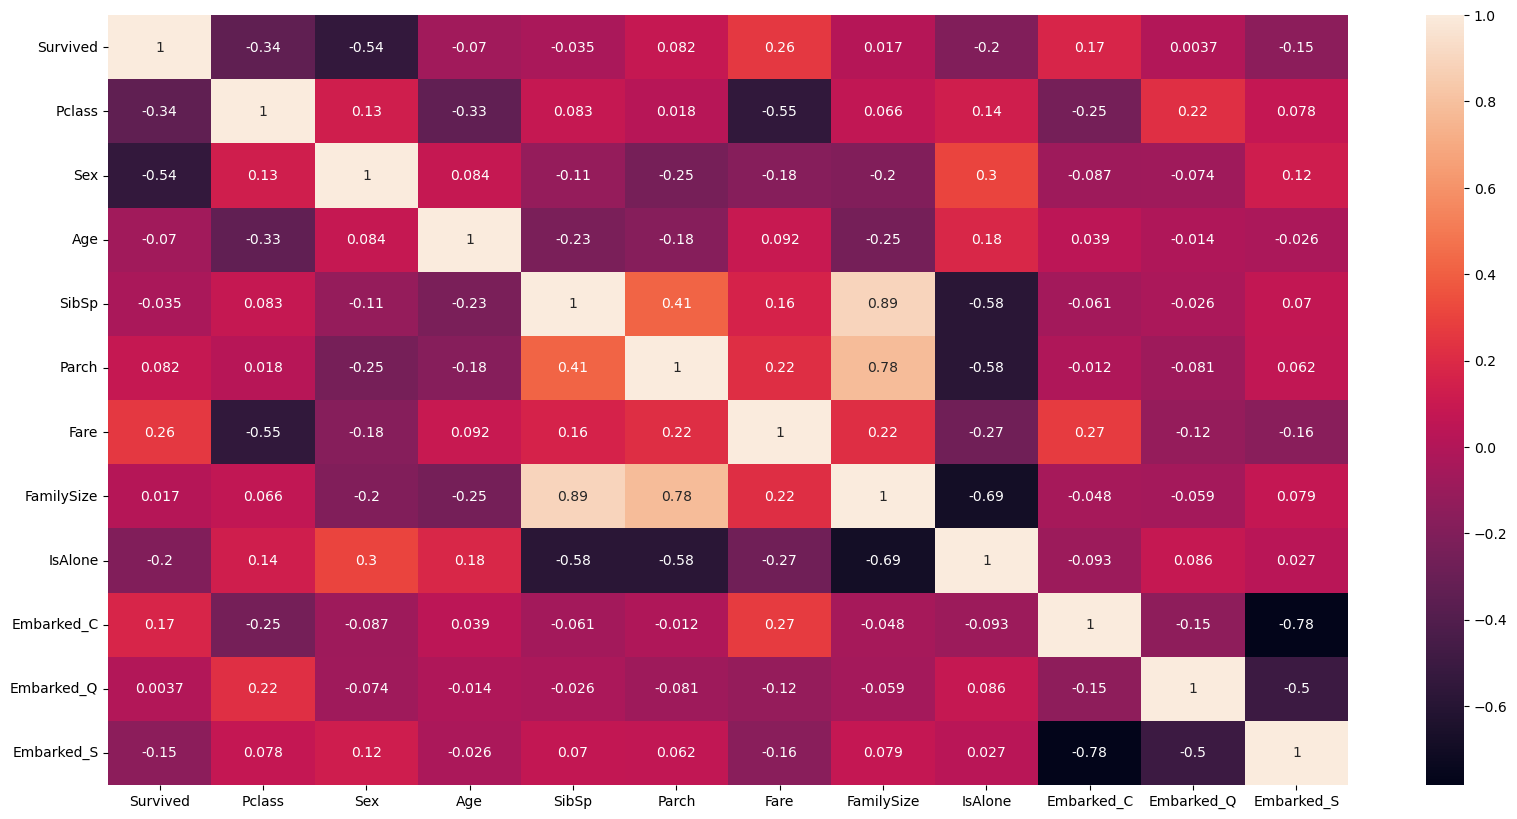

In [87]:
#Creating a correlation matrix
matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(matrix, annot=True)
plt.show()

Sex: There's a strong negative correlation between Sex and Survived. Since we've encoded males as 1 and females as 0, it means that females possess a higher likelihood of survival compared to males.
Pclass: There's a noticeable negative correlation between passenger class (Pclass) and survival. This suggests that passengers in higher classes (Class 1) had a better chance of surviving than those in lower classes.
Fare: There's a positive correlation between Fare and Survival. Passengers who paid higher fares were more likely to survive, which is consistent with the correlation seen with Pclass.
IsAlone: Passengers traveling alone had a slightly lower chance of survival, as indicated by the negative correlation.
Embarked_S: Passengers who boarded from Southampton (Embarked_S) had a slightly lower survival rate.

In [88]:
from sklearn.model_selection import train_test_split
#Features
x = df.drop("Survived", axis=1)
#Target variable
y = df["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((712, 11), (179, 11))

In [89]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
331,1,1,45.500000,0,0,28.5000,1,1,0,0,1
733,2,1,23.000000,0,0,13.0000,1,1,0,0,1
382,3,1,32.000000,0,0,7.9250,1,1,0,0,1
704,3,1,26.000000,1,0,7.8542,2,0,0,0,1
813,3,0,6.000000,4,2,31.2750,7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,1,1,0,0,1
270,1,1,29.699118,0,0,31.0000,1,1,0,0,1
860,3,1,41.000000,2,0,14.1083,3,0,0,0,1
435,1,0,14.000000,1,2,120.0000,4,0,0,0,1


In [90]:
# Training the models
log.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Making the prediction on testing set
log_pred = log.predict(x_test)
rf_pred = rf.predict(x_test)

# Evaluating the models
log_accuracy = accuracy_score(y_test, log_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

log_accuracy, rf_accuracy

(0.8044692737430168, 0.8268156424581006)

As it can be observed that the accuracy for random forest classifier, i.e, 82.68% which is highest, hence we will proceed with it

In [92]:
#Now creating the function to predict whether the person survived or not on the basis of Pclass, Sex, Age, SibSp, Parch, Fare, FamilySize, IsAlone, Embarked
def likelihood(model, pclass, sex, age, sibsp, parch, fare, familysize, isalone, embarked):
    input_data = pd.DataFrame({
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'FamilySize': [familysize],
        'IsAlone': [isalone],
        'Embarked_C': [1 if embarked.lower() == 'C' else 0],
        'Embarked_Q': [1 if embarked.lower() == 'Q' else 0],
        'Embarked_S': [1 if embarked.lower() == 'S' else 0]})
    probablity = model.predict(input_data)
    return probablity[0]

In [93]:
input_values = likelihood(rf, 3, 1, 22, 1, 0, 7.25000, 2, 0, 'S')
print(f"Passenger status", input_values)

Passenger status 0


In [94]:
input_values = likelihood(rf, 1, 0, 38, 1, 0, 78.2833, 2, 0, 'C')
print(f"Passenger status", input_values)

Passenger status 1


As the above function is giving correct answer that whether passenger survived or not on the basis of input values of paramenters, hence our model is performing well and accurately.